<a href="https://colab.research.google.com/github/JosenildoJunior/Lh_desafio/blob/main/Desafio_indicium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio**

Você foi contratado por um estúdio de Hollywood chamado PProductions, e agora deve fazer uma análise em cima de um banco de dados cinematográfico para orientar qual tipo de filme deve ser o próximo a ser desenvolvido. Lembre-se que há muito dinheiro envolvido, então a análise deve ser muito detalhada e levar em consideração o máximo de fatores possíveis (a introdução de dados externos é permitida - e encorajada).


# **Entregas**

- 1. Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses relacionadas. Seja criativo!

- 2. Responda também às seguintes perguntas:

  - Qual filme você recomendaria para uma pessoa que você não conhece?
  - Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?
  - Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

- 3. Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

- 4.Supondo um filme com as seguintes características:

  {'Series_Title': 'The Shawshank Redemption',
  'Released_Year': '1994',
  'Certificate': 'A',
  'Runtime': '142 min',
  'Genre': 'Drama',
  'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
  'Meta_score': 80.0,
  'Director': 'Frank Darabont',
  'Star1': 'Tim Robbins',
  'Star2': 'Morgan Freeman',
  'Star3': 'Bob Gunton',
  'Star4': 'William Sadler',
  'No_of_Votes': 2343110,
  'Gross': '28,341,469'}


Qual seria a nota do IMDB?

- 5. Salve o modelo desenvolvido no formato .pkl.
- 6. A entrega deve ser feita através de um repositório de código público que contenha:

  - README explicando como instalar e executar o projeto
  - Arquivo de requisitos com todos os pacotes utilizados e suas versões
  - Relatórios das análises estatísticas e EDA em PDF, Jupyter Notebook ou semelhante conforme passo 1 e 2.
  - Códigos de modelagem utilizados no passo 3 (pode ser entregue no mesmo Jupyter Notebook).
  - Arquivo .pkl conforme passo 5 acima.
  Todos os códigos produzidos devem seguir as boas práticas de codificação.


# **Ajustes iniciais**

Antes de tudo, vamos importar as bibliotecas que serão necessárias para realizarmos nossas análises.

In [ ]:
# Manipulação de dados
import pandas as pd

# Algébra linear
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Funções estatísticas
import statistics
from scipy import stats

# Importando o skew
from scipy.stats import skew

Agora vamos importar nossos dados.

In [ ]:
# Acesso ao drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importando o dataset
df = pd.read_csv('/content/drive/MyDrive/Dados/desafio_indicium_imdb.csv')

# Observando os primeiro registros
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


Neste primeiro contato, podemos notar que nossa base de dados possui diversos tipos de dados, desde numéricos até categóricos. Dito isso, vamos observar as dimensões deste nosso dataset.

In [ ]:
# Dimensão do nosso DF
df.shape

(999, 16)

Temos um total de 999 linhas e 16 colunas. Sabendo disso, vamos dar uma olhada no nosso dicionário de dados.

Agora vamos observar o dicionário dos dados.

- Series_Title – Nome do filme
- Released_Year - Ano de lançamento
- Certificate - Classificação etária
- Runtime – Tempo de duração
- Genre - Gênero
- IMDB_Rating - Nota do IMDB
- Overview - Overview do filme
- Meta_score - Média ponderada de todas as críticas
- Director – Diretor
- Star1 - Ator/atriz #1
- Star2 - Ator/atriz #2
- Star3 - Ator/atriz #3
- Star4 - Ator/atriz #4
- No_of_Votes - Número de votos
- Gross - Faturamento


Agora que temos o dicionário para nos auxiliar, vamos observar o tipo de dado presente em cada uma das nossas colunas.

In [ ]:
# Observando o tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


Agora podemos notar que a variável 'Unnamed' é do tipo inteiro. Essa variável normalmente aparece em arquivos do tipo CSV; ela é algo como um índice sem nome. Dito isso, vamos excluí-la do nosso df.

In [ ]:
# Excluindo a coluna 'Unnamed:0'
df = df.drop('Unnamed: 0', axis = 1)

Agora, vamos seguir para as próximas etapas e dividir nossos dados numéricos dos nossos dados categóricos.

**Dados numéricos**

- A variável 'IMDB_Rating' é uma variável numérica do tipo float.
- A variável 'Meta_score' também é numérica do tipo float.
- A variável 'No_of_Votes' é numérica do tipo int.

**Dados categóricos**

Já os dados categóricos são compostos pelas seguintes variáveis:

- 'Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre', 'Overview', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'Gross'.

Aqui podemos notar que alguns dados categóricos deveriam ser do tipo numérico. Um exemplo é a variável 'Gross', que se refere ao faturamento e deveria ser do tipo float. Algo semelhante acontece com a variável 'Released_Year', que deveria ser do tipo numérico ou do tipo date. Também podemos observar a variável 'Runtime', que representa o tempo do filme em minutos e está como categórica.

É possível realizar algumas conversões necessárias para que possamos trabalhar melhor com esses dados.

Dito isso, antes de partirmos para os próximos passos, vamos realizar essas conversões visando analisar os dados de forma mais assertiva.

Ajustando os dados presentes na coluna **'Gross'**.

In [ ]:
# Removendo as vírgulas, convertendo para numérico e substituindo valores inválidos por NaN
df['Gross'] = df['Gross'].str.replace(',', '')
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

# Convertendo para float
df['Gross'] = df['Gross'].astype(float)

# Formatando a coluna 'Gross' para exibição
df['Gross_formatted'] = df['Gross'].apply(lambda x: f"{x:,.0f}" if pd.notnull(x) else 'NaN')

Após essas operações, os dados na coluna 'Gross_formatted' que criamos já devem estar em um formato que vai facilitar a nossa leitura, enquanto os dados presentes na variável 'Gross' agora são float. Dito isso, vamos ajustar o restante das nossas variáveis.

Ajustando os dados presentes na coluna **'Released_Year'**.

In [ ]:
# Convertendo as datas
df['Released_Year'] = pd.to_datetime(df['Released_Year'], format='%Y', errors='coerce')
df['Released_Year'] = df['Released_Year'].dt.year

Dessa forma, nossos dados na coluna 'Released_Year' assumem o tipo float.

Ajustando os dados presentes na coluna **'Runtime'**.

In [ ]:
# Removendo a unidade de tempo e transformando para inteiro
df['Runtime/min'] = df['Runtime'].str.replace(' min', '').astype(float)

# Excluindo a coluna Runtime
df.drop('Runtime', axis = 1)

,Series_Title,Released_Year,Certificate,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Gross_formatted,Runtime/min
0,The Godfather,1972.0,A,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,"134,966,411",175.0
1,The Dark Knight,2008.0,UA,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,"534,858,444",152.0
2,The Godfather: Part II,1974.0,A,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,"57,300,000",202.0
3,12 Angry Men,1957.0,U,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,"4,360,000",96.0
4,The Lord of the Rings: The Return of the King,2003.0,U,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0,"377,845,905",201.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,Breakfast at Tiffany's,1961.0,A,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN,NaN,115.0
995,Giant,1956.0,G,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN,NaN,201.0
996,From Here to Eternity,1953.0,Passed,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0,"30,500,000",118.0
997,Lifeboat,1944.0,NaN,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN,NaN,97.0


Após essa mudança, os dados na coluna 'Runtime' assumem o tipo float.

Para confirmar as mudanças, vamos observar algumas informações dos nossos dados:

- Os valores presentes na coluna 'Gross' foram convertidos para tipo float.
- Os dados na coluna 'Released_Year' foram convertidos para tipo float.
- Na coluna 'Runtime', removemos 'min', deixamos um espaço em branco no lugar e transformamos o restante do valor em tipo int.

Vamos proceder com a verificação dos dados para confirmar essas alterações.

In [ ]:
# Observando algumas informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Series_Title     999 non-null    object 
 1   Released_Year    998 non-null    float64
 2   Certificate      898 non-null    object 
 3   Runtime          999 non-null    object 
 4   Genre            999 non-null    object 
 5   IMDB_Rating      999 non-null    float64
 6   Overview         999 non-null    object 
 7   Meta_score       842 non-null    float64
 8   Director         999 non-null    object 
 9   Star1            999 non-null    object 
 10  Star2            999 non-null    object 
 11  Star3            999 non-null    object 
 12  Star4            999 non-null    object 
 13  No_of_Votes      999 non-null    int64  
 14  Gross            830 non-null    float64
 15  Gross_formatted  999 non-null    object 
 16  Runtime/min      999 non-null    float64
dtypes: float64(5), i

Com as mudanças aplicadas com sucesso, podemos avançar com a nossa análise. Se precisar de mais alguma coisa ou tiver outras dúvidas, estou à disposição para ajudar!

# **Análise inicial nos dados**

Nessa etapa, vamos estabelecer um primeiro contato com os nossos dados. Para começar, vamos responder algumas perguntas:



- Quantos dados temos? (Número de linhas e colunas)

- Quais são as colunas numéricas?

- Existem dados nulos nesta base de dados? O que será que esses dados indicam ?

- Qual é a média, mediana, 25º percentil, 75º percentil, mínimo e máximo de cada uma das colunas numéricas?

Como vimos anteriormente, nosso DataFrame possui 999 linhas e 16 colunas.

Vamos verificar quantas colunas numéricas restaram após aplicarmos as devidas transformações.

In [ ]:
# Observando algumas informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Series_Title     999 non-null    object 
 1   Released_Year    998 non-null    float64
 2   Certificate      898 non-null    object 
 3   Runtime          999 non-null    object 
 4   Genre            999 non-null    object 
 5   IMDB_Rating      999 non-null    float64
 6   Overview         999 non-null    object 
 7   Meta_score       842 non-null    float64
 8   Director         999 non-null    object 
 9   Star1            999 non-null    object 
 10  Star2            999 non-null    object 
 11  Star3            999 non-null    object 
 12  Star4            999 non-null    object 
 13  No_of_Votes      999 non-null    int64  
 14  Gross            830 non-null    float64
 15  Gross_formatted  999 non-null    object 
 16  Runtime/min      999 non-null    float64
dtypes: float64(5), i

**Dados numéricos**

- As variáveis 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Runtime/min'.

**Dados do tipo data**

- A variavel 'Released_Year'

**Dados categóricos**

- 'Series_Title', 'Certificate', 'Genre', 'Overview', 'Director', 'Star1', 'Star2', 'Star3', 'Star4'.

Agora vamos observar quantos valores ausentes existem em nossa base.

In [ ]:
# Observando os valores ausentes
def percent_ausentes(df):
    p_faltantes = df.isnull().mean()
    valores_faltantes = pd.DataFrame({'Variavéis': df.columns,
                                           '% de ausentes': p_faltantes}
                                      ).reset_index(drop = True)

    return valores_faltantes.sort_values(by = ['% de ausentes'], ascending = False)

# Exibindo a quantidade de valores ausentes
percent_ausentes(df)

,Variavéis,% de ausentes
14,Gross,0.169169
7,Meta_score,0.157157
2,Certificate,0.101101
1,Released_Year,0.001001
0,Series_Title,0.000000
10,Star2,0.000000
15,Gross_formatted,0.000000
13,No_of_Votes,0.000000
12,Star4,0.000000
11,Star3,0.000000


A variável 'Gross' apresenta cerca de 16,9% de valores ausentes. Também podemos observar cerca de 15,7% de dados ausentes na variável 'Meta_score', 10,1% em 'Certificate' e 1% em 'Released_Year'. Levando em consideração a quantidade dos nossos dados, muito provavelmente teremos 169 valores ausentes em 'Gross', 157 em 'Meta_score', 101 em 'Certificate' e 1 em 'Released_Year'.

Vamos verificar se essas suspeitas realmente estão corretas.

In [ ]:
# Observando a soma dos valores ausentes
df.isnull().sum().sort_values(ascending = False)

Gross              169
Meta_score         157
Certificate        101
Released_Year        1
Series_Title         0
Star2                0
Gross_formatted      0
No_of_Votes          0
Star4                0
Star3                0
Director             0
Star1                0
Overview             0
IMDB_Rating          0
Genre                0
Runtime              0
Runtime/min          0
dtype: int64

Confirmarmos nossas suspeitas. Agora podemos seguir para a observação do resumo estatístico dos nossos dados.

In [ ]:
# Resumo estatístico dos dados
desc = df.describe()

# Formatar números para exibir menos casas decimais
pd.options.display.float_format = '{:.3f}'.format

# Exibindo as estatísticas descritivas formatadas
desc

,Released_Year,IMDB_Rating,Meta_score,No_of_Votes,Gross,Runtime/min
count,998.000,999.000,842.000,999.000,830.000,999.000
mean,1991.214,7.948,77.969,271621.422,68082574.105,122.872
std,23.309,0.272,12.383,320912.621,109807553.386,28.101
min,1920.000,7.600,28.000,25088.000,1305.000,45.000
25%,1976.000,7.700,70.000,55471.500,3245338.500,103.000
50%,1999.000,7.900,79.000,138356.000,23457439.500,119.000
75%,2009.000,8.100,87.000,373167.500,80876340.250,137.000
max,2020.000,9.200,100.000,2303232.000,936662225.000,321.000


Observando os dados em 'Released_Year', que se refere ao ano de lançamento dos filmes:

- Podemos observar que o filme mais antigo em nossa base é de 1920. Cerca de 25% dos filmes foram lançados antes de 1976, enquanto metade dos filmes foram lançados antes de 1999, e a outra metade após 1999. Apenas 25% dos filmes foram lançados depois de 2009. Aqui, a média está um pouco distante da mediana, indicando que a distribuição pode ser assimétrica.

Agora vamos observar a coluna 'IMDB_Rating':

- Temos uma nota média de 7,9, sendo que a menor nota é 7,6. Cerca de 25% dos filmes apresentam uma nota menor que a média, 50% dos filmes apresentam notas iguais ou abaixo da média, e 25% dos filmes têm notas acima de 8,1. A maior nota de um filme foi 9,2. A média é próxima da mediana, sugerindo uma distribuição próxima da normal. O desvio padrão é baixo, 0,27, o que indica pouca variação em relação à média.

Observando a coluna 'Meta_score':

- A média é 77, enquanto a menor nota é 28. Cerca de 25% dos filmes têm notas iguais ou inferiores a 70, metade dos filmes têm notas iguais ou inferiores a 75, e 25% têm notas acima de 87. O máximo é 100. O desvio padrão não é muito alto, sugerindo que os dados não estão muito distantes da média.

Observando a coluna 'No_of_Votes':

- A média de votos é 271 mil, com o menor número de votos sendo 25 mil. Cerca de 25% dos filmes têm 55 mil votos ou menos, metade dos filmes têm 138 mil votos ou menos, e 25% têm 373 mil votos ou mais. O máximo é 2 milhões e 300 mil votos. O desvio padrão é de 320 mil, indicando que os dados estão dispersos, como evidenciado pela diferença entre média e mediana.

Observando a coluna 'Gross':

- O faturamento médio dos filmes é de 68 milhões, com o menor faturamento sendo 1 milhão e 300 mil. Cerca de 25% dos filmes têm um faturamento de 3 milhões ou menos, metade dos filmes têm 23 milhões ou menos, e 25% têm 80 milhões ou mais. O máximo é 936 milhões. O desvio padrão é alto, 100 milhões, e a diferença entre a média e a mediana sugere uma distribuição que não se aproxima de uma normal.


# **Análise univariada**

Nas etapas anteriores realizamos algumas analises iniciais para irmos nos familiarizando melhor com os nossoss dados agora vamos realizar uma analise mais indivual dos nossos dados dito isso nossos objetivos serão:

- Realizar uma análise mais aprofundada das nossas variáveis de interesse.

- Criar uma visualização mais agradável.

## **Variáveis numéricas**

Vamos prosseguir com a análise univariada das variáveis numéricas.

### **Released_Year**

Começaremos com a variável 'Released_Year'.

In [ ]:
# Resumo estátistico
df['Released_Year'].describe()

count    998.000
mean    1991.214
std       23.309
min     1920.000
25%     1976.000
50%     1999.000
75%     2009.000
max     2020.000
Name: Released_Year, dtype: float64

**Pontos importantes:**

- Como já vimos anteriormente, o filme mais antigo em nossa base é de 1920, enquanto o mais recente é de 2020. Metade dos nossos dados são de 1999 ou mais antigos.

- Ao observarmos o gráfico, podemos notar que os lançamentos apresentam picos em determinados anos, porém mostram uma tendência crescente ao longo dos anos. No entanto, em 2020, há uma queda brusca, muito provavelmente devido ao cenário global de uma pandemia.

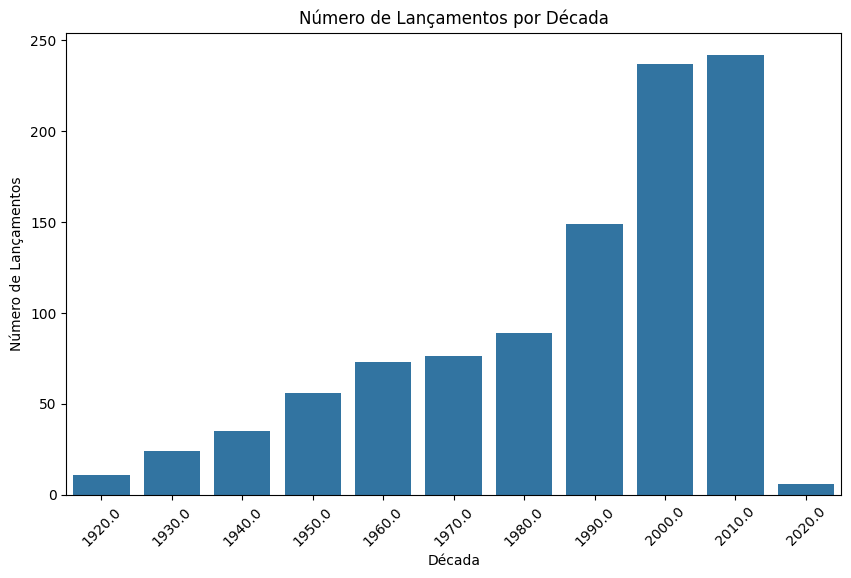

In [ ]:
# Agrupando por décadas
df['Decade'] = (df['Released_Year'] // 10) * 10

# Contando o número de lançamentos por década
decade_counts = df['Decade'].value_counts().sort_index()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=decade_counts.index, y=decade_counts.values)
plt.xlabel('Década')
plt.ylabel('Número de Lançamentos')
plt.title('Número de Lançamentos por Década')
plt.xticks(rotation=45)
plt.show()

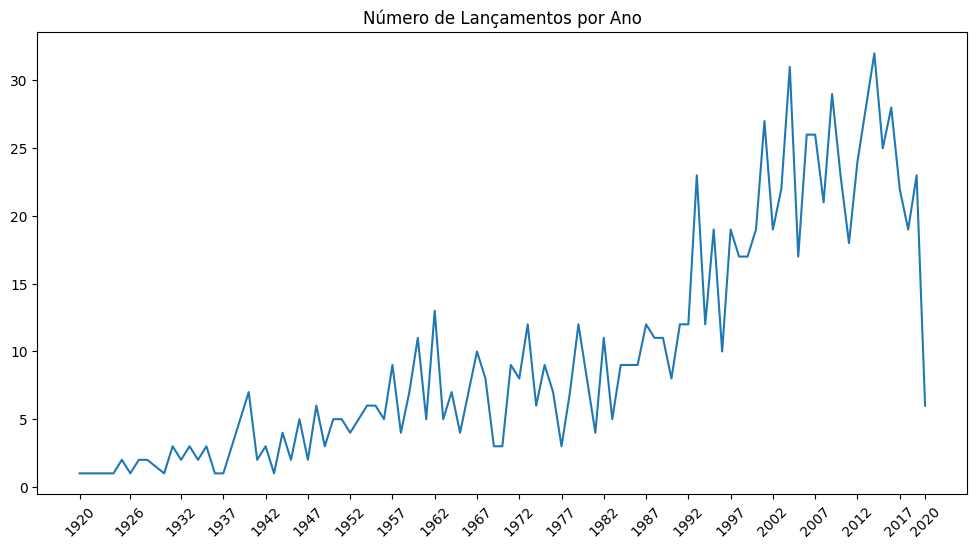

In [ ]:
# Contando o número de lançamentos por ano
year_counts = df['Released_Year'].value_counts().sort_index()

# Plotando o gráfico de linha
plt.figure(figsize=(12, 6))
sns.lineplot(x=year_counts.index, y=year_counts.values)
plt.xlabel('')
plt.title('Número de Lançamentos por Ano')

# Criando uma lista de rótulos para o eixo x a cada 5 anos e incluindo o último ano
ticks = list(year_counts.index[::5])
if year_counts.index[-1] not in ticks:
    ticks.append(year_counts.index[-1])

plt.xticks(ticks=ticks, rotation=45)
plt.show()

**Conclusões**

- A análise dos lançamentos de filmes entre 1920 e 2020 revela um crescimento consistente na produção cinematográfica ao longo do século, com um aumento notável nas décadas de 2000 e 2010, que registraram os maiores números de lançamentos. No entanto, em 2020, observamos uma queda abrupta no número de filmes lançados, provavelmente devido à pandemia global de COVID-19, que impactou drasticamente a indústria cinematográfica.

### **IMDB**

Vamos observar um pouco mais a fundo as notas no IMDB.

In [ ]:
# Resumo estátistico
df['IMDB_Rating'].describe()

count   999.000
mean      7.948
std       0.272
min       7.600
25%       7.700
50%       7.900
75%       8.100
max       9.200
Name: IMDB_Rating, dtype: float64

**Pontos importantes:**

- A média das notas dos filmes é aproximadamente 7,95, com a menor nota sendo 7,6 e a maior nota sendo 9,2. A mediana das notas é 7,9, o que significa que metade dos filmes tem uma nota menor ou igual a 7,9. Além disso, 75% dos filmes possuem notas menores ou iguais a 8,1.

- O desvio padrão é relativamente baixo, apenas 0,27, indicando que a maioria das notas está próxima da média.

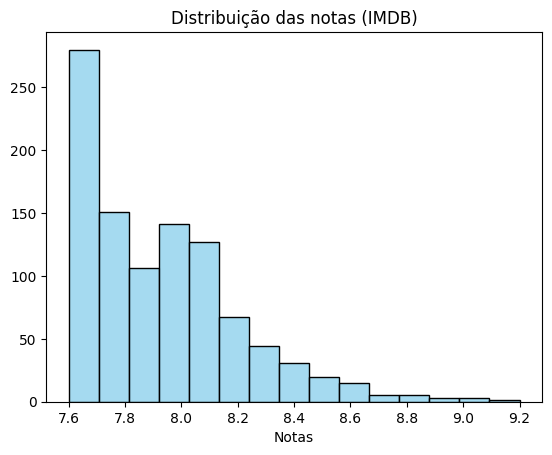

In [ ]:
# Criando o gráfico
sns.histplot(df['IMDB_Rating'], bins = 15, color = 'skyblue')

# Definindo título e labels
plt.title('Distribuição das notas (IMDB)')
plt.xlabel('Notas')
plt.ylabel('')

# Exibindo o gráfico
plt.show()

Embora as notas apresentem um desvio padrão relativamente baixo, indicando que a maior parte dos dados está próxima da média, a média é bem próxima da mediana. No entanto, podemos observar que os dados apresentam uma assimetria positiva (à direita), indicando que menos filmes têm notas mais altas. Vamos checar o skew dessa coluna.

In [ ]:
# Medindo a simetria da distribuição de dados
df['IMDB_Rating'].skew()

0.9466926905932237

A assimetria positiva (skew = 0,94) indica que a distribuição das notas tem uma cauda mais longa à direita, com menos filmes recebendo notas muito altas.

**Conclusões**

- As notas variam entre 7,6 e 9,2, mostrando uma faixa moderada de variação. A maioria dos filmes tem notas próximas à média, como indicado pelo desvio padrão relativamente baixo de 0,27.

- Apesar de a maioria das notas dos filmes se concentrar em torno da média de 7,94, a distribuição apresenta uma assimetria positiva. O desvio padrão baixo reforça a ideia de que as notas são relativamente consistentes, com poucas exceções extremas.

- A assimetria positiva, refletida por um coeficiente de skew de 0,94, indica que há menos filmes com notas muito altas, resultando em uma cauda mais longa à direita na distribuição das notas.

### **Meta_score**

Vamos observar de forma mais detalhada a variável 'Meta_score'.

In [ ]:
# Resumo estátistico
df['Meta_score'].describe()

count   842.000
mean     77.969
std      12.383
min      28.000
25%      70.000
50%      79.000
75%      87.000
max     100.000
Name: Meta_score, dtype: float64

**Pontos importantes**

- A média dos meta scores é de aproximadamente 77, com o menor valor sendo 28 e o maior sendo 100. Mais da metade dos filmes têm um meta score superior à média de 77.

- O desvio padrão é de 12,38, indicando uma dispersão moderada dos dados em relação à média.

- Os meta scores variam de 28 a 100, mostrando uma ampla variação na avaliação crítica dos filmes.

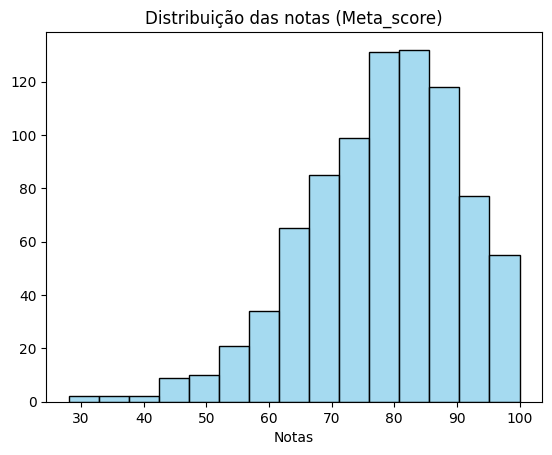

In [ ]:
# Criando o gráfico
sns.histplot(df['Meta_score'], bins = 15, color = 'skyblue')

# Definindo título e labels
plt.title('Distribuição das notas (Meta_score)')
plt.xlabel('Notas')
plt.ylabel('')

# Exibindo o gráfico
plt.show()

Como suspeitávamos, essa variável realmente apresentou uma assimetria à esquerda, indicando assim que essa assimetria é negativa. Levando em consideração que a média é 77, podemos observar que a maior parte dos nossos dados está acima dessa média.

In [ ]:
# Medindo a simetria da distribuição de dados
df['Meta_score'].skew()

-0.604316230073612

**Conclusões**

- A análise dos meta scores revela que a maioria dos filmes é bem avaliada, com mais da metade recebendo meta scores superiores à média de 77. A dispersão moderada dos dados em relação à média, indicada pelo desvio padrão, reflete uma variedade significativa nas opiniões críticas.

- A assimetria negativa da distribuição, conforme indicado pelo coeficiente de skew, sugere que há mais filmes com avaliações críticas mais altas do que aquelas com avaliações muito baixas, contribuindo para uma cauda mais longa à esquerda na distribuição dos meta scores.

### **No_of_votes**

Iniciando a análise na variável referente ao número de votos dos filmes.

In [ ]:
# Resumo estátistico
df['No_of_Votes'].describe()

count       999.000
mean     271621.422
std      320912.621
min       25088.000
25%       55471.500
50%      138356.000
75%      373167.500
max     2303232.000
Name: No_of_Votes, dtype: float64

**Pontos importantes:**

- Aqui podemos notar que a média de votos é de 271 mil. O filme com menos votos tem 25 mil votos, enquanto o filme mais votado tem 2 milhões de votos, indicando uma ampla variação no número de votos.

- Temos um desvio padrão de 320 mil, o que pode ser considerado um desvio bastante grande em relação a essa variável. Muito provavelmente os dados estão bem dispersos em relação à média.

- Comparando a média com a mediana, notamos mais uma vez a discrepância entre essas medidas, o que confirma nossas suspeitas de que os dados estão bem dispersos.

- Quando observamos os quartis, podemos notar que a maior parte dos dados está acima da média.

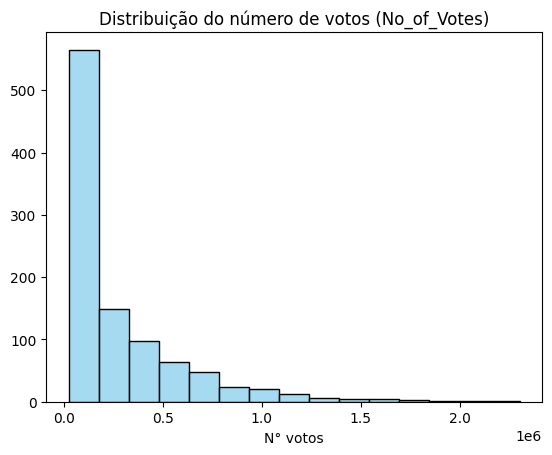

In [ ]:
# Criando o gráfico
sns.histplot(df['No_of_Votes'], bins = 15, color = 'skyblue')

# Definindo título e labels
plt.title('Distribuição do número de votos (No_of_Votes)')
plt.xlabel('N° votos')
plt.ylabel('')

# Exibindo o gráfico
plt.show()

Vamos observar o skew (assimetria) dessa variável.

In [ ]:
skew(df['No_of_Votes'])

2.1910548929956533

Aqui notamos um skew bem forte e positivo, indicando uma cauda bem longa à direita dos dados. Como suspeitamos anteriormente, existem muitos filmes com poucos votos e poucos filmes com muitos votos.

**Conclusões**

- Os números de votos para filmes revelam uma distribuição amplamente variada: a média é de aproximadamente 271 mil votos, com filmes oscilando de 25 mil a 2 milhões de votos. Isso evidencia uma grande dispersão em relação à média, com um desvio padrão de 320 mil votos, indicando que a popularidade dos filmes varia consideravelmente.

- A diferença significativa entre a média e a mediana dos votos confirma a assimetria na distribuição: a média é influenciada por alguns filmes com números muito altos de votos, enquanto a maioria dos filmes está abaixo dessa média. Observando os quartis, nota-se que a maior parte dos filmes está acima da média de votos, sugerindo a presença de filmes muito populares que influenciam positivamente a média.

- O skewness positivo forte de 2,1 indica uma cauda longa à direita na distribuição dos votos, o que significa que há muitos filmes com votos relativamente baixos, enquanto poucos filmes recebem um número muito elevado de votos. Essa assimetria destacada reflete a disparidade na popularidade dos filmes, com alguns alcançando um grande reconhecimento e outros tendo um alcance limitado entre o público.

### **Gross**

Vamos observar o que a nossa variável de faturamento tem a nos dizer.

In [ ]:
# Resumo estátistico
df['Gross'].describe()

count         830.000
mean     68082574.105
std     109807553.386
min          1305.000
25%       3245338.500
50%      23457439.500
75%      80876340.250
max     936662225.000
Name: Gross, dtype: float64

**Pontos importantes**

- O faturamento médio dos filmes é de aproximadamente 68 milhões, com um desvio padrão significativo de cerca de 109 milhões, indicando uma grande variabilidade nos valores.

- A mediana do faturamento dos filmes é de 23 milhões, o que sugere que a metade dos filmes estão abaixo desse valor, indicando uma possível assimetria positiva na distribuição.

- O filme com o menor faturamento na amostra tem 1305, enquanto o filme com o maior faturamento alcançou 936 milhões, destacando a vasta gama de valores presentes na variável.

Antes de partirmos para outra visualização vamos observar a quantidade de outliers em 'Gross'

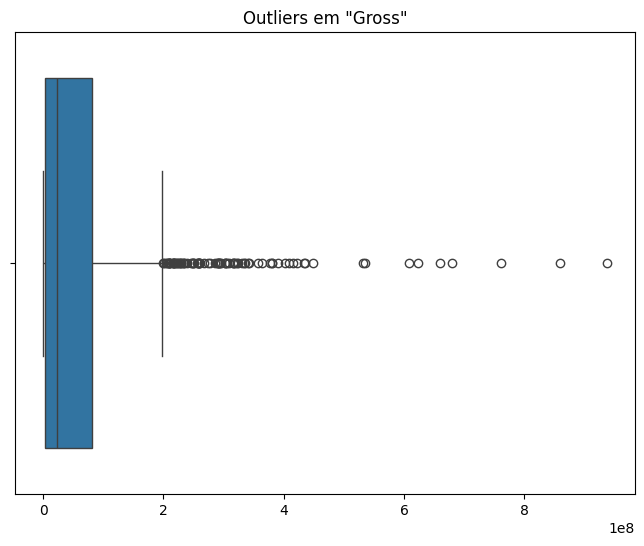

In [ ]:
# Definindo o tamanho da figura
plt.figure(figsize=(8, 6))

# Criando o boxplot
sns.boxplot(data = df, x = 'Gross')

# Definindo título e labels
plt.title('Outliers em "Gross"')
plt.xlabel('')
plt.ylabel('')

# Exibindo o gráfico
plt.show()

Podemos observar que essa variavel possui um alto numero de outliers talvez seja mais interessante utilizar a mediana, ao inves de utilizar a média para realização de calculos

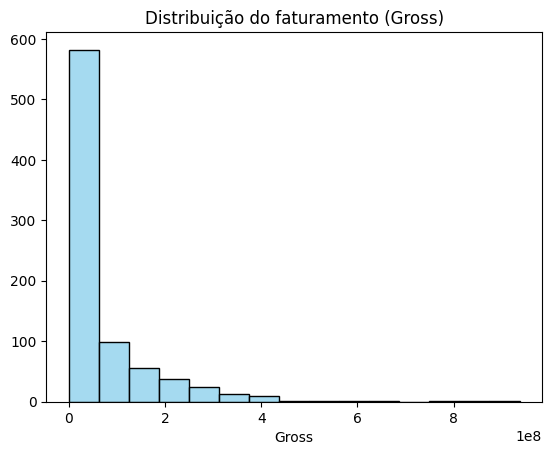

In [ ]:
# Criando o gráfico
sns.histplot(df['Gross'], bins = 15, color = 'skyblue')

# Definindo título e labels
plt.title('Distribuição do faturamento (Gross)')
plt.xlabel('Gross')
plt.ylabel('')

# Exibindo o gráfico
plt.show()

A notação científica está sendo usada devido aos altos valores no gráfico, mas isso não compromete a interpretação dos resultados.

A distribuição dos dados parece ser assimétrica positivamente, sugerindo que há mais filmes com faturamentos menores e menos filmes com faturamentos muito altos.

Entendi. Como a variável 'Gross' possui valores ausentes, a função 'skew()' não retornará a simetria dos dados, mas sim um valor nulo.

In [ ]:
# Medindo a simetria da distribuição de dados
skew(df['Gross'])

nan

Como suspeitamos anteriormente, não conseguiremos utilizar essa função no momento devido aos valores ausentes na variável 'Gross'.

**Conclusões**

- A analise do faturamento dos filmes revela uma distribuição amplamente dispersa, com uma média significativa de aproximadamente 68 milhões de dólares e um desvio padrão elevado de cerca de 109 milhões de dólares. A mediana de 23 milhões de dólares indica que a metade dos filmes na amostra faturam abaixo desse valor, sugerindo uma predominância de filmes com faturamentos moderados a baixos.

- A presença de valores extremos, desde 1305 até 936 milhões de dólares, ilustra a vasta variedade de faturamentos dentro da indústria cinematográfica.

- A distribuição assimétrica positiva indica que há mais filmes com faturamentos menores do que filmes com faturamentos muito altos, sublinhando a raridade de sucessos de bilheteria extraordinários.

### **Runtime**

Vamos analisar mais detalhadamente a duração dos filmes.

In [ ]:
# Resumo estátistico
df['Runtime/min'].describe()

count   999.000
mean    122.872
std      28.101
min      45.000
25%     103.000
50%     119.000
75%     137.000
max     321.000
Name: Runtime/min, dtype: float64

**Pontos importantes**

- A duração média dos filmes é de aproximadamente 122 minutos, o que equivale a cerca de duas horas e dois minutos. O desvio padrão de 28 minutos indica que os tempos de duração dos filmes variam consideravelmente em relação à média.

- O filme mais curto na amostra possui 45 minutos de duração, enquanto o mais longo atinge 321 minutos, aproximadamente cinco horas e meia. Isso destaca a ampla variação na duração dos filmes estudados.

- A mediana de 119 minutos indica que metade dos filmes têm uma duração de quase duas horas, sugerindo uma concentração em torno desse valor.

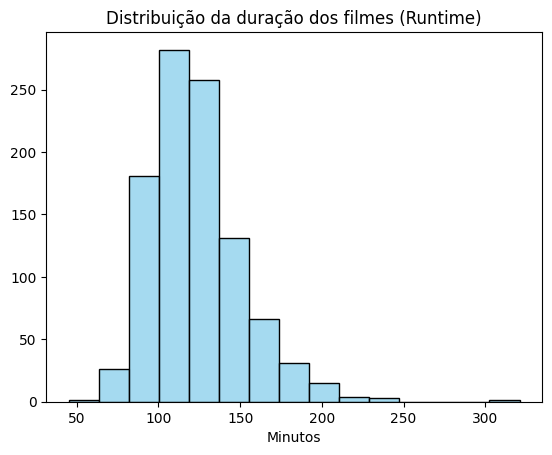

In [ ]:
# Criando o gráfico
sns.histplot(df['Runtime/min'], bins = 15, color = 'skyblue')

# Definindo título e labels
plt.title('Distribuição da duração dos filmes (Runtime)')
plt.xlabel('Minutos')
plt.ylabel('')

# Exibindo o gráfico
plt.show()

A distribuição dos dados mostra uma assimetria positiva (skewness à direita), o que sugere que a maioria dos filmes tem durações em torno de duas horas, enquanto menos filmes possuem durações significativamente mais longas.

In [ ]:
# Medindo a simetria da distribuição de dados
skew(df['Runtime/min'])

1.2080596847333653

O valor de skewness forte de 1,2 confirma a assimetria positiva à direita, reforçando a concentração dos filmes em durações menores, com uma cauda longa de filmes com durações excepcionalmente longas.

**Conclusões**

- Os filmes têm uma duração média de aproximadamente 122 minutos, com um desvio padrão de 28 minutos, o que indica uma variação razoável em relação à média. A amplitude dos dados vai de 45 a 321 minutos, destacando uma grande diversidade nas durações dos filmes, com a maioria concentrada em torno de 125 minutos, ou seja, um pouco mais de duas horas.

- A distribuição dos dados mostra uma clara assimetria positiva, evidenciada pelo valor de skewness de 1,2, indicando que a maioria dos filmes tem durações menores, enquanto uma minoria significativa apresenta durações muito longas. Essa característica sugere que filmes com durações excepcionalmente longas são menos comuns

- Os dados revelam uma variedade considerável nas durações dos filmes, com uma tendência predominante para durações mais curtas, embora haja filmes com durações muito extensas que contribuem para a complexidade e diversidade na indústria cinematográfica.

## **Variáveis categóricas**

O objetivo aqui é o mesmo da análise univariada numérica, que inclui:

- Realizar uma análise mais aprofundada das nossas variáveis de interesse.
- Criar visualizações mais agradáveis.

Nessa etapa, vamos realizar uma análise univariada apenas nas variáveis categóricas.

Antes de começarmos, vamos criar um DataFrame apenas com as variáveis categóricas. Em seguida, utilizaremos apenas as variáveis que considero relevantes para a análise no momento.

In [ ]:
# Selecionando apenas as colunas categóricas
df_categoricas = df.select_dtypes(include='object')

# Exibir as primeiras linhas do DataFrame resultante
df_categoricas.head()

,Series_Title,Certificate,Runtime,Genre,Overview,Director,Star1,Star2,Star3,Star4,Gross_formatted
0,The Godfather,A,175 min,"Crime, Drama",An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,"134,966,411"
1,The Dark Knight,UA,152 min,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,"534,858,444"
2,The Godfather: Part II,A,202 min,"Crime, Drama",The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,"57,300,000"
3,12 Angry Men,U,96 min,"Crime, Drama",A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,"4,360,000"
4,The Lord of the Rings: The Return of the King,U,201 min,"Action, Adventure, Drama",Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,"377,845,905"


Agora podemos prosseguir com nossas análises.

### **Certificate**

Antes de iniciarmos a análise, precisaremos realizar alguns ajustes nesta variável. Como vimos no começo, ela possui valores ausentes. Vamos preencher esses valores com a seguinte denominação: 'CD', que representa 'Classificação Desconhecida'. Dito isso, vamos seguir adiante.

In [ ]:
# Preenchendo os valores ausentes com 'CD'
df_categoricas['Certificate'] = df_categoricas['Certificate'].fillna('CD')

# Realizando a contagem das frequencias
frequencia_certificate = df_categoricas['Certificate'].value_counts()

Agora que já sabemos quantas vezes cada classificação se repete no nosso DataFrame, inclusive quando temos um valor ausente, vamos observar como se comporta essa variável.

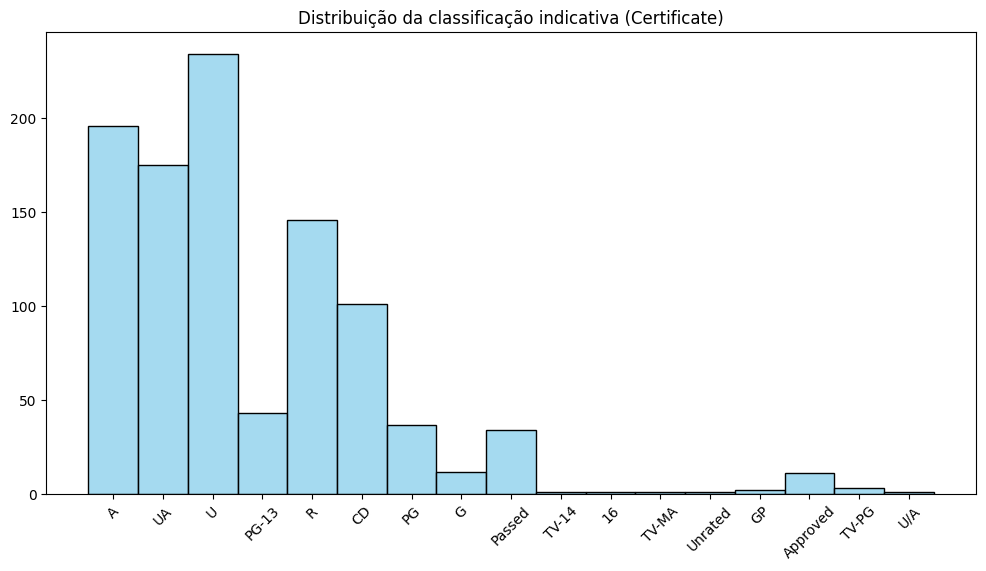

In [ ]:
# Tamanho da figura
plt.figure(figsize=(12, 6))

# Criando o gráfico
sns.histplot(df_categoricas['Certificate'], bins = 15, color = 'skyblue')

# Definindo título e labels
plt.title('Distribuição da classificação indicativa (Certificate)')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
# Exibindo o gráfico
plt.show()


Lembrando que essas classificações são dividads da seguinte forma:

- **U (Universal)**: Adequado para todos os públicos.
- **A (Adult)**: Adequado apenas para adultos.
- **UA (Universal/Adult)**: Adequado para públicos acima de 12 anos, podendo ser assistido por crianças acompanhadas de um adulto.
- **R (Restricted)**: Restrito, geralmente significa que menores de 17 anos precisam estar acompanhados de um adulto.
- **CD**: Classificação não identificada ou não especificada.
- **PG-13 (Parents Strongly Cautioned)**: Alguns materiais podem ser inadequados para menores de 13 anos.
- **PG (Parental Guidance)**: Supervisão dos pais sugerida, alguns materiais podem não ser adequados para crianças.
- **Passed**: Classificação mais antiga, indicando que o filme foi aprovado pelo código de produção da época.
- **G (General Audiences)**: Adequado para todos os públicos.
- **Approved**: Filme aprovado pelo sistema de classificação de filmes da época.
- **TV-PG (Parental Guidance Suggested)**: Supervisão dos pais sugerida para programas de televisão.
- **GP**: Classificação anterior ao PG, usada brevemente no início dos anos 1970.
- **TV-14**: Adequado para maiores de 14 anos, programas de televisão.
- **16**: Adequado para maiores de 16 anos.
- **TV-MA (Mature Audience)**: Adequado apenas para adultos, programas de televisão.
- **Unrated**: Filme não classificado oficialmente.
- **U/A**: Outra forma de denotar a classificação "UA" (Universal/Adult).


**Conclusões**

- A análise dos dados revela que a classificação predominante é a 'U', indicando que a maioria dos filmes são adequados para todos os públicos. Em seguida, a classificação 'A' para filmes voltados exclusivamente para adultos é a segunda mais comum. A classificação 'UA', destinada a públicos acima de 12 anos acompanhados por um adulto, também é significativa. Logo depois, a classificação 'R' sugere que muitos filmes requerem a supervisão de um adulto para menores de 17 anos. Além disso, uma quantidade notável de filmes possui classificações não identificadas ou ausentes, representadas aqui como 'CD'.

Essas são as classificações mais recorrentes em nossos dados, refletindo a diversidade de públicos-alvo atendidos pelos filmes analisados.

### **Genre**

Para trabalharmos melhor com essa variável, será necessário realizar alguns procedimentos. Aqui estão os passos que iremos seguir:

- Criaremos uma cópia do DataFrame 'df_categoricas', pois as coisas podem ficar um pouco confusas após executarmos os passos seguintes. Faremos essas operações em um DataFrame separado.
  
- Observamos anteriormente que os valores na coluna 'Genre' estão divididos por uma vírgula e um espaço. Primeiramente, vamos separar os valores com base nesses dois caracteres.

- Em seguida, transformaremos cada elemento dessa separação em linhas individuais, armazenando cada elemento separado em uma linha própria.

- Por último, contaremos a frequência com que cada elemento aparece.

In [ ]:
# Criando um novo DataFrame para evitar modificar o original
df_categoricas_copy = (df_categoricas.copy())

In [ ]:
# Dividindo os gêneros separados por vírgula em listas
df_categoricas_copy['Genre'] = df_categoricas_copy['Genre'].str.split(', ')

# Explodindo as listas de gêneros em linhas separadas (se necessário)
df_categoricas_copy = df_categoricas_copy.explode('Genre').reset_index(drop=True)

# Contando a frequência de cada gênero
frequencia_generos = df_categoricas_copy['Genre'].value_counts()

# Exibindo a frequência de cada gênero
print(frequencia_generos)

Genre
Drama        723
Comedy       233
Crime        209
Adventure    196
Action       189
Thriller     137
Romance      125
Biography    109
Mystery       99
Animation     82
Sci-Fi        67
Fantasy       66
Family        56
History       56
War           51
Music         35
Horror        32
Western       20
Film-Noir     19
Sport         19
Musical       17
Name: count, dtype: int64


Agora podemos identificar o gênero predominante em nossa base de dados. Destacamos os cinco gêneros mais comuns:

- 1º: Drama
- 2º: Comédia
- 3º: Crime
- 4º: Aventura
- 5º: Ação

Vamos observar graficamente essa distribuição dos gêneros.

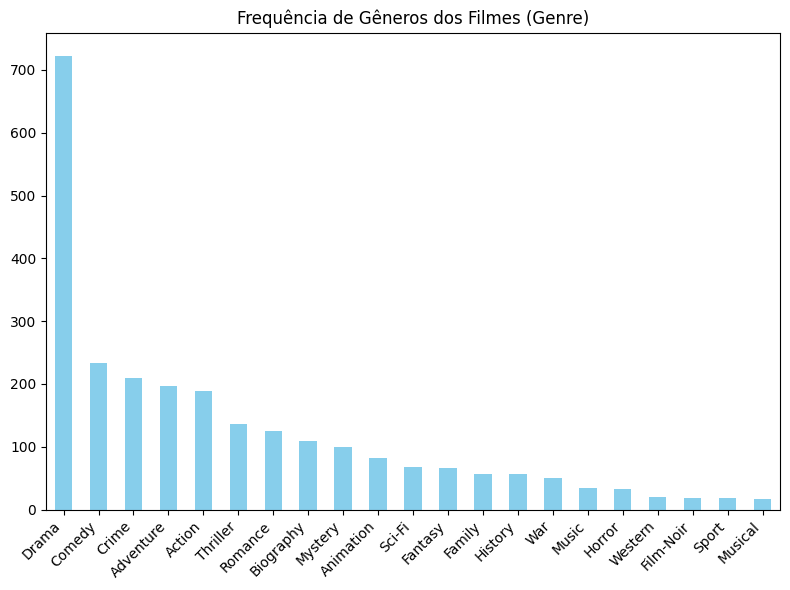

In [ ]:
# Criando o gráfico de barras
plt.figure(figsize=(8, 6))
frequencia_generos.plot(kind='bar', color='skyblue')
plt.xlabel('')
plt.ylabel('')
plt.title('Frequência de Gêneros dos Filmes (Genre)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Dessa forma, podemos ter uma visão mais gráfica, por assim dizer, de quais são os gêneros mais populares dos filmes em nosso DataFrame.

### **Overview**

Vamos tentar uma abordagem diferente para esta coluna. Vamos tentar entender um pouco do que se passa em cada um desses resumos utilizando uma análise de sentimento. Para isso, será necessário realizar algumas importações.

In [ ]:
# Importando a biblioteca
from textblob import TextBlob

# Função para calcular a polaridade do sentimento usando TextBlob
def analise_sentimento(texto):
    blob = TextBlob(texto)
    return blob.sentiment.polarity

Agora que importamos a biblioteca e criamos a função para analisar os sentimentos, vamos aplicar essa função na nossa coluna de resumos. Os valores positivos representarão sentimentos positivos, os valores negativos representarão sentimentos negativos e os valores nulos representarão sentimentos neutros.

In [ ]:
# Aplicando a análise de sentimento aos resumos
df_categoricas['Sentimento'] = df_categoricas['Overview'].apply(analise_sentimento)

# Exibir os resultados
print(df_categoricas[['Overview', 'Sentimento']])

                                              Overview  Sentimento
0    An organized crime dynasty's aging patriarch t...       0.000
1    When the menace known as the Joker wreaks havo...       0.333
2    The early life and career of Vito Corleone in ...       0.118
3    A jury holdout attempts to prevent a miscarria...       0.000
4    Gandalf and Aragorn lead the World of Men agai...       0.000
..                                                 ...         ...
994  A young New York socialite becomes interested ...       0.067
995  Sprawling epic covering the life of a Texas ca...       0.100
996  In Hawaii in 1941, a private is cruelly punish...      -0.167
997  Several survivors of a torpedoed merchant ship...       0.000
998  A man in London tries to help a counter-espion...      -0.050

[999 rows x 2 columns]


Como podemos observar ao lado de cada overview temos uma polarização dos sentimentos, vamos observar mais de perto esses valores.

In [ ]:
# Resumo estátistico
df_categoricas['Sentimento'].describe()

count   999.000
mean      0.011
std       0.250
min      -1.000
25%      -0.100
50%       0.000
75%       0.136
max       1.000
Name: Sentimento, dtype: float64

**Pontos importantes**

- Podemos observar que nossos resumos têm uma média próxima de zero, indicando uma distribuição relativamente neutra dos sentimentos.

- Os percentis revelam que a maioria dos dados está concentrada em valores neutros ou ligeiramente negativos, com uma pequena proporção de filmes com resumos extremamente positivos ou negativos.

- A média e a mediana próximas sugerem uma distribuição simétrica ou quase simétrica dos sentimentos nos resumos.

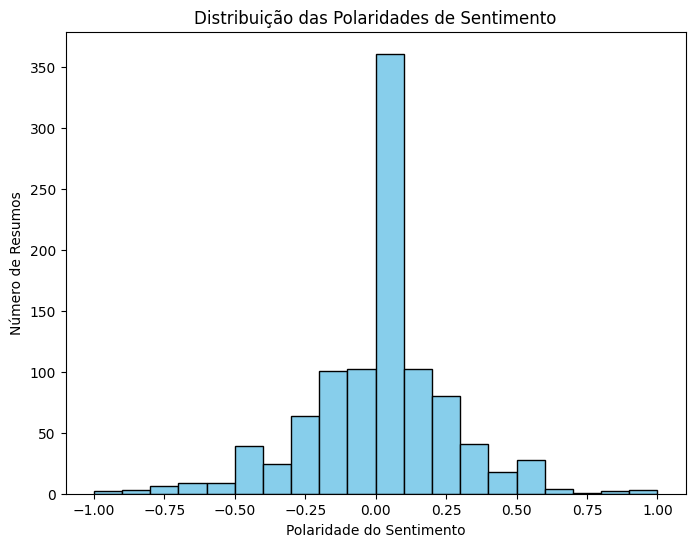

In [ ]:
# Criando histograma das polaridades de sentimento
plt.figure(figsize=(8, 6))
plt.hist(df_categoricas['Sentimento'], bins=20, color='skyblue', edgecolor='black')

# Adicionar título e rótulos aos eixos
plt.title('Distribuição das Polaridades de Sentimento')
plt.xlabel('Polaridade do Sentimento')
plt.ylabel('')

# Exibir o histograma
plt.show()

Embora a distribuição se assemelhe à normal devido à baixa variação nos dados, é perceptível essa assimetria leve, refletindo uma predominância de valores baixos de sentimento nos resumos.

In [ ]:
# Medindo a simetria da distribuição de dados
skew(df_categoricas['Sentimento'])

-0.27672970374347694

A assimetria positiva leve (skew = 0.2) indica que a distribuição tem uma cauda ligeiramente estendida para a direita, com a maioria dos sentimentos concentrados em valores mais baixos.

**Conclusões**

- Ao analisar os resumos de filmes, observamos que a distribuição dos sentimentos é predominantemente neutra, com uma média próxima de zero. Isso sugere que a maioria dos filmes tende a apresentar resumos que não são fortemente positivos nem negativos. Os percentis revelam que a maior parte dos dados está concentrada em sentimentos neutros ou ligeiramente negativos, com uma pequena proporção de filmes apresentando resumos extremamente positivos ou negativos.

# **Análise bivariada**

Nessa etapa, vamos observar as interações entre as variáveis e conferir se conseguiremos extrair algumas informações importantes. É aqui que iremos verificar algumas hipóteses.

### O ano de lançamento pode impactar no faturamento do filmes ?

Vamos começar observando como essas variáveis se comportam entre si.

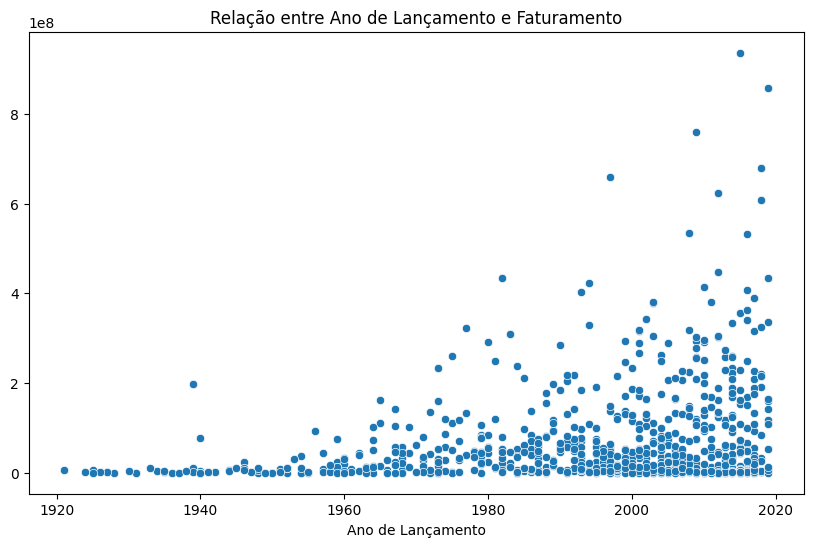

In [ ]:
# Gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Released_Year', y='Gross', data=df)
plt.title('Relação entre Ano de Lançamento e Faturamento')
plt.xlabel('')
plt.ylabel('')
plt.show()

Podemos observar que realmente alguns casos que apresentam um faturamento maior vão se tornando mais comuns com o passar do tempo.

Mas será que esse aumento é estatisticamente significativo? Para isso, vamos realizar um teste de hipóteses. Mas, antes, precisaremos tratar os valores ausentes. Vamos criar uma cópia do nosso dataframe, onde realizaremos essas operações.

In [ ]:
# Criando uma cópia do nosso df original
df_copy = df.copy()

Agora que criamos a cópia, vamos observar a quantidade de valores nulos e realizar o tratamento desses dados.

In [ ]:
# Observando os valores ausentes
print(df_copy[['Released_Year', 'Gross']].isnull().sum())

Released_Year      1
Gross            169
dtype: int64


Agora, vamos realizar o tratamento. Como a variável 'Gross' apresenta muitos outliers, para realizar o preenchimento dos valores ausentes dessa coluna, irei utilizar a mediana dos dados.

Enquanto na coluna 'Released_Year' temos apenas um valor ausente, então é possível simplesmente excluirmos essa linha.

Dito isso, vamos realizar esses passos.

In [ ]:
# Preenchendo os valores ausentes com a mediana
df_copy['Gross'] = df_copy['Gross'].fillna(df_copy['Gross'].median())

# Excluindo o único valor ausente
df_copy = df_copy.dropna(subset=['Released_Year'])

Agora, vamos verificar quantos valores ausentes restaram em nossa base.

In [ ]:
# Exibindo a quantidade de valor ausente restante na nossa base
print(df_copy[['Released_Year', 'Gross']].isnull().sum())

Released_Year    0
Gross            0
dtype: int64


Agora é o momento em que poderemos aplicar o teste de hipóteses, mas antes de definirmos qual teste será utilizado, iremos observar a distribuição dos nossos dados.

In [ ]:
# Em breve!!!

### **Matriz de correlação**

Vamos criar uma matriz de correlação para observar como as nossas variáveis demonstram correlacionamentos entre si.

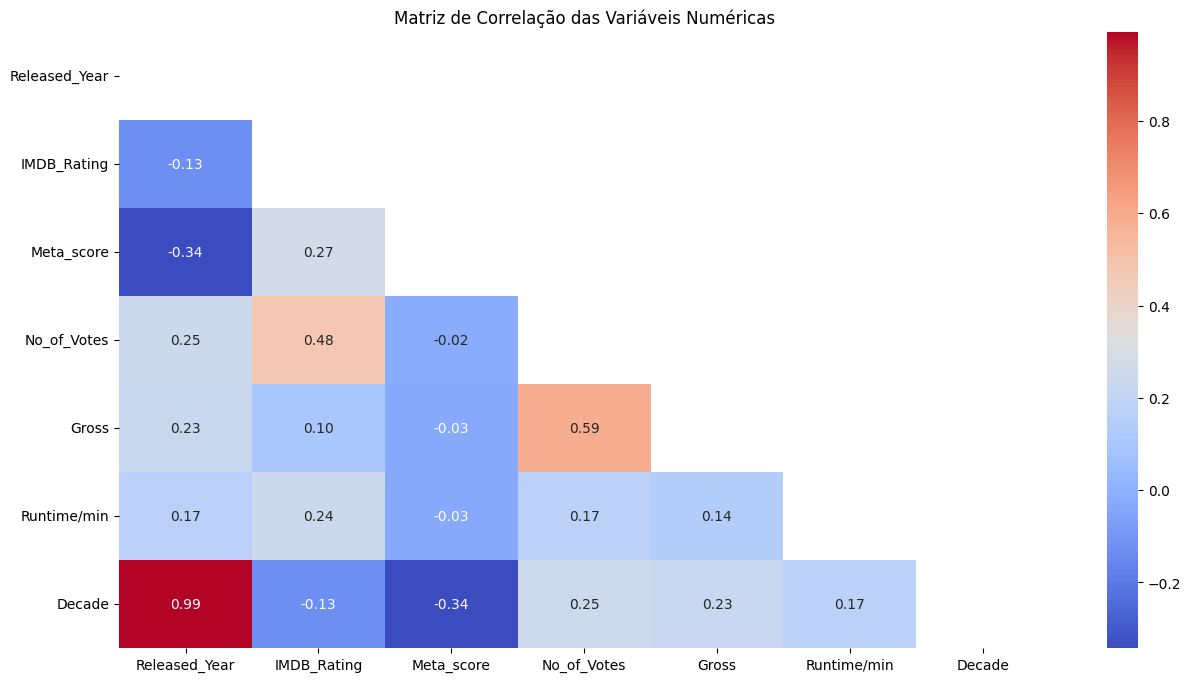

In [ ]:
# Gerando a matriz de correlação das variáveis numéricas do DataFrame
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calculando a matriz de correlação
correlation_matrix = df_numeric.corr()

# Gerando uma máscara para esconder a metade superior da matriz de correlação
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plotando o gráfico de correlação usando seaborn com a máscara (apenas um lado do triângulo)
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)

# Adicionando o título
plt.title('Matriz de Correlação das Variáveis Numéricas')

# Exibindo o gráfico
plt.show()

In [ ]:
# Em breve!!!

# **Respondendo às Perguntas**

## **Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?**

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Lista de palavras-chave para diferentes gêneros
generos_palavras_chave = {
    'Drama': ['drama', 'trágico', 'emocional', 'conflito'],
    'Comedy': ['comédia', 'engraçado', 'riso', 'humor'],
    'Crime': ['crime', 'criminal', 'investigação', 'detetive'],
    'Adventure': ['aventura', 'exploração', 'viagem', 'coragem'],
    'Action': ['ação', 'combate', 'aventura', 'luta'],
    'Thriller': ['suspense', 'tensão', 'perigo', 'mistério'],
    'Romance': ['romance', 'amor', 'relacionamento', 'paixão'],
    'Biography': ['biografia', 'vida', 'história', 'real'],
    'Mystery': ['mistério', 'enigma', 'intriga', 'segredo'],
    'Animation': ['animação', 'animações', 'desenhos', 'infantil'],
    'Sci-Fi': ['ficção', 'científico', 'futurista', 'tecnologia'],
    'Fantasy': ['fantasia', 'mágico', 'místico', 'imaginário'],
    'Family': ['família', 'infantil', 'crianças', 'união'],
    'History': ['história', 'passado', 'historiador', 'antigo'],
    'War': ['guerra', 'batalha', 'conflito', 'soldado'],
    'Music': ['música', 'musical', 'melodia', 'harmonia'],
    'Horror': ['terror', 'medo', 'assustador', 'sobrenatural'],
    'Western': ['western', 'oeste', 'cowboy', 'fronteira'],
    'Film-Noir': ['film-noir', 'noir', 'crime', 'mistério'],
    'Sport': ['esporte', 'atleta', 'competição', 'jogo'],
    'Musical': ['musical', 'música', 'canção', 'dança']
}

# Função para determinar o gênero baseado no resumo
def determinar_genero(resumo):
    tokens = word_tokenize(resumo.lower())
    stopwords_pt = set(stopwords.words('portuguese'))  # stopwords em português

    # Remover stopwords e pontuações
    tokens_limpos = [token for token in tokens if token.isalnum() and token not in stopwords_pt]

    # Contar ocorrências de palavras-chave por gênero
    genero_contagem = {genero: sum(tokens_limpos.count(palavra) for palavra in palavras_chave)
                       for genero, palavras_chave in generos_palavras_chave.items()}

    # Determinar o gênero com a contagem máxima
    genero_predito = max(genero_contagem, key=genero_contagem.get)

    return genero_predito

# Aplicar a função a cada resumo na coluna 'Overview'
df['Genero_Predito'] = df['Overview'].apply(determinar_genero)

# Exibir os resultados
print(df[['Overview', 'Genero_Predito']])

# **Gerando o requirements**

In [ ]:
"""

# Gerar o arquivo de requisitos
!pip freeze > requirements.txt

# Verificar o conteúdo do arquivo de requisitos
!cat requirements.txt

# Baixar o arquivo de requisitos
from google.colab import files
files.download('requirements.txt')

"""

"\n\n# Gerar o arquivo de requisitos\n!pip freeze > requirements.txt\n\n# Verificar o conteúdo do arquivo de requisitos\n!cat requirements.txt\n\n# Baixar o arquivo de requisitos\nfrom google.colab import files\nfiles.download('requirements.txt')\n\n"